In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler

In [2]:
df_heart=pd.read_csv("heart_failure_clinical_records.csv")

In [3]:
df_heart.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0


In [4]:
df_heart.shape

(5000, 13)

In [5]:
df_heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

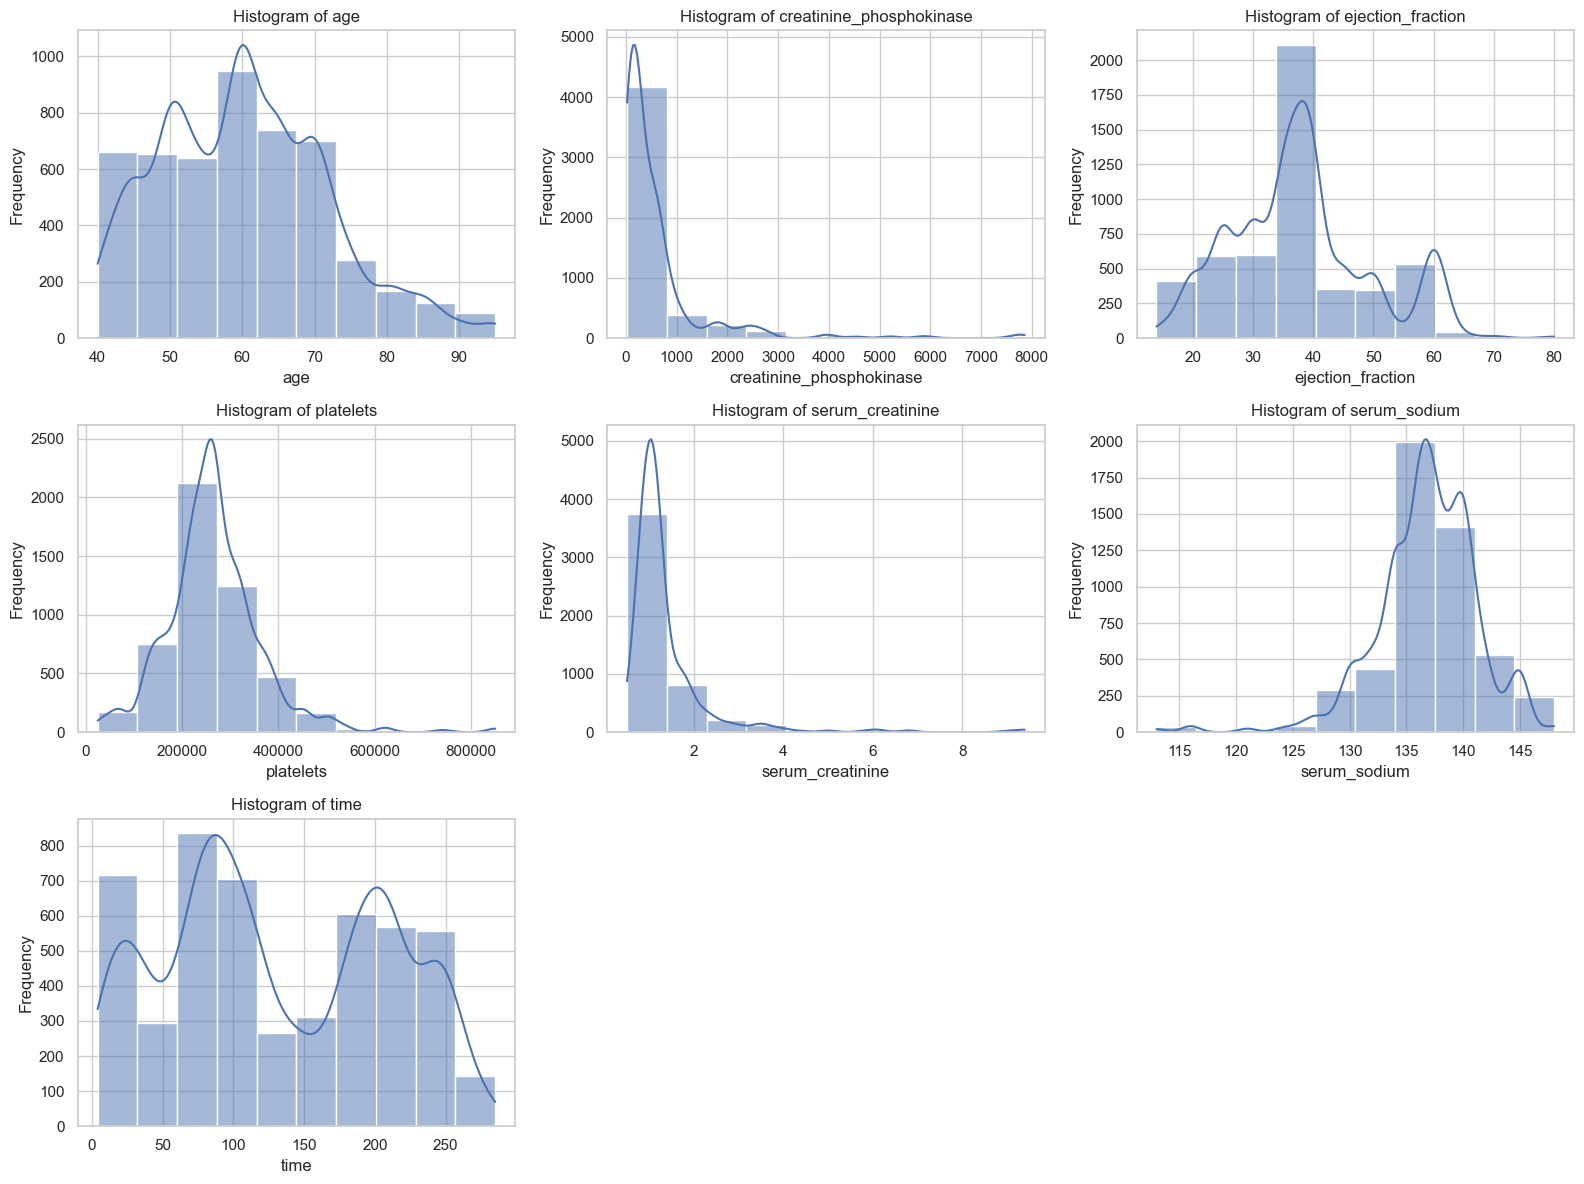

In [18]:
sns.set(style="whitegrid")

features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_heart[feature], bins=10, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

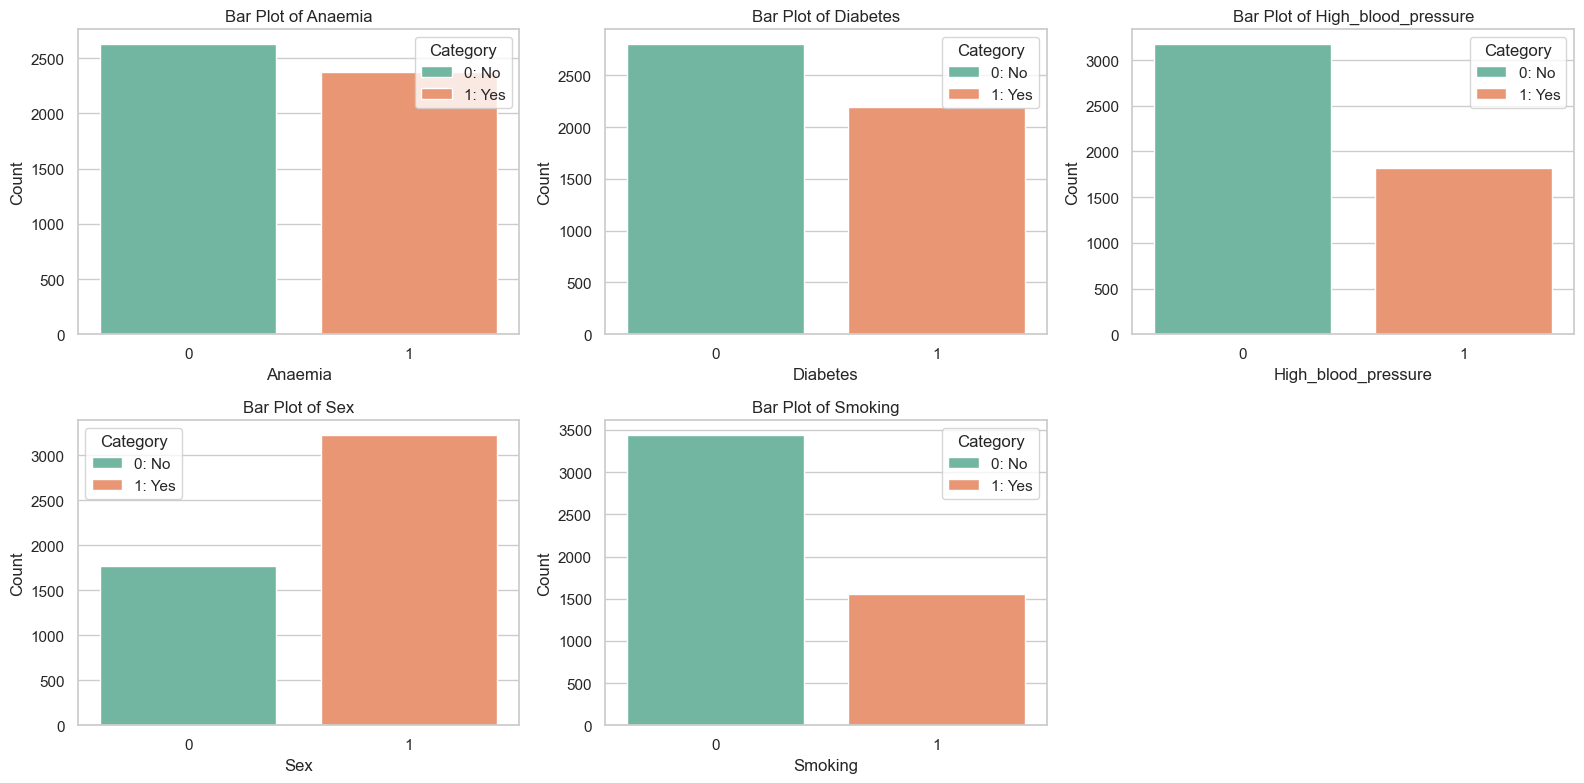

In [19]:
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


plt.figure(figsize=(16, 8))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    
    ax = sns.countplot(x=feature, data=df_heart, palette='Set2')
    
    plt.title(f'Bar Plot of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')

    ax.legend(labels=['0: No', '1: Yes'], title='Category')

plt.tight_layout()
plt.show()

In [21]:
X=df_heart.drop("death_event",axis=1)
y=df_heart["death_event"]

In [22]:
Scaler=StandardScaler()

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [24]:
X_train[features]=Scaler.fit_transform(X_train[features])
X_test[features]=Scaler.transform(X_test[features])

# Model Training using GaussianNB

In [29]:
model_Gnb=GaussianNB()
model_Gnb.fit(X_train,y_train)
y_pred_Gnb=model_Gnb.predict(X_test)
print(f"The Classification report of Gaussian_NB is :\n\n{classification_report(y_test,y_pred_Gnb)}")

The Classification report of Gaussian_NB is :

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [32]:
probabilities_Gnb=model_Gnb.predict_proba(X_test)[:,1]
fpr_Gnb,tpr_Gnb,threshold_Gnb=roc_curve(y_test,probabilities_Gnb)
roc_auc_Gnb=auc(fpr_Gnb,tpr_Gnb)
print("AUC for GaussianNB:", roc_auc_Gnb)

AUC for GaussianNB: 0.8790854196850709


In [36]:
desired_recall_Gnb=0.85
closest_index_Gnb=np.argmin(abs(tpr_Gnb-desired_recall_Gnb))
optimal_threshold_Gnb=threshold_Gnb[closest_index_Gnb]
optimal_fpr_Gnb=fpr_Gnb[closest_index_Gnb]
print(f"Optimal threshold for 85% recall: {optimal_threshold_Gnb}, FPR: {optimal_fpr_Gnb}")

Optimal threshold for 85% recall: 0.09000947872507015, FPR: 0.28944381384790013


# Model Training Using SVC

In [39]:
model_svc=SVC(kernel='linear', probability=True)
model_svc.fit(X_train,y_train)
y_pred_svc=model_svc.predict(X_test)
print(f"The Classification report of SVC is :\n\n{classification_report(y_test,y_pred_svc)}")

The Classification report of SVC is :

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [40]:
probabilities_svc=model_svc.predict_proba(X_test)[:,1]
fpr_svc,tpr_svc,threshold_svc=roc_curve(y_test,probabilities_svc)
roc_auc_svc=auc(fpr_svc,tpr_svc)
print("AUC for SVC:", roc_auc_svc)

AUC for SVC: 0.8932077061973798


In [41]:
desired_recall_svc=0.9
closest_index_svc=np.argmin(abs(tpr_svc-desired_recall_svc))
optimal_threshold_svc=threshold_svc[closest_index_svc]
optimal_fpr_svc=fpr_svc[closest_index_svc]
print(f"Optimal threshold for 90% recall: {optimal_threshold_svc}, FPR: {optimal_fpr_svc}")

Optimal threshold for 90% recall: 0.18453846810741661, FPR: 0.3348467650397276


# Model Training Using Xtreme Gradient Boosting

In [42]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)
print(f"The Classification report of XGB Classifier is :\n\n{classification_report(y_test,y_pred_xgb)}")

The Classification report of XGB Classifier is :

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [43]:
probabilities_xgb=model_xgb.predict_proba(X_test)[:,1]
fpr_xgb,tpr_xgb,threshold_xgb=roc_curve(y_test,probabilities_xgb)
roc_auc_xgb=auc(fpr_xgb,tpr_xgb)
print("AUC for XGB:", roc_auc_xgb)

AUC for XGB: 0.9991971429362421


# ROC_CURVE OF GaussianNB , SVC & XGB Models

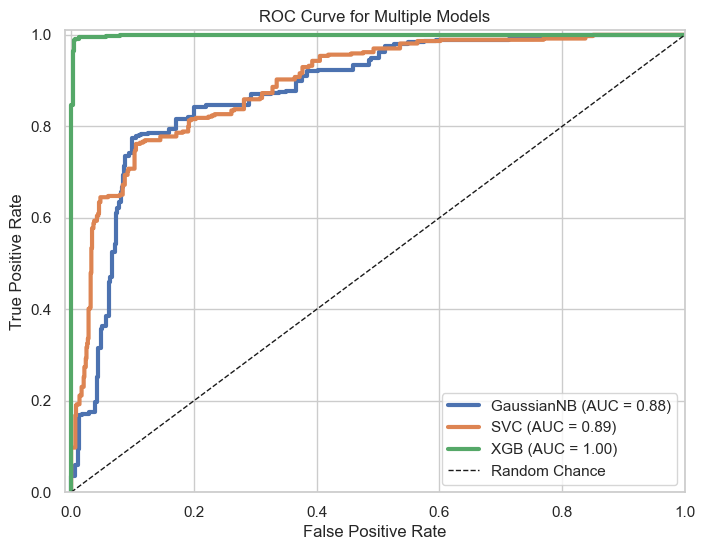

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_Gnb, tpr_Gnb, label=f'GaussianNB (AUC = {roc_auc_Gnb:.2f})',linewidth=3)
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})',linewidth=3)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {roc_auc_xgb:.2f})',linewidth=3)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance',linewidth=1)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')

plt.show()